In [2]:
import numpy as np
from   matplotlib import pyplot as plt


In [3]:
def model(X_v, y_v):

    C = np.matmul(X_v.T, X_v)
    x_mean = np.mean(X_v, axis=0)


    if type(C) is np.float64:
        inv_C = 1/C
        w     = inv_C * np.matmul(X_v.T, y)
        R2i   = w * np.matmul(X_v.T, X_v) * w / len(y_v)

    else:
        inv_C = np.linalg.inv(C)
        w     = np.matmul(np.matmul(inv_C, X_v.T), y)
        R2i   = np.matmul(np.diag(w.T), np.matmul(np.matmul(X_v.T, X_v), w)) / len(y_v)

    return w, R2i



In [9]:
samples = 10000
covariance = np.array([
    [1.0, 0.6, 0.8],
    [0.6, 1.0, 0.0],
    [0.8, 0.0, 1.0]
])

phi = []

for i in range(100000):
    data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance, size=samples, check_valid='warn')
    
    X = data[:,:2]
    y = data[:, 2]
    
    (w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)
    phi_1 = 0.5 * (R1 + sum(Rn) - R2)
    phi_2 = 0.5 * (R2 + sum(Rn) - R1)
    phi.append([phi_1, phi_2])
    
np_phi = np.array(phi)

print(np.mean(np_phi, axis=0))
#print(np.std(np_phi, axis=0))
print('Max Phi_2', np.max(np_phi, axis=0)[1])
  



C:\Users\ams90\AppData\Local\Temp\ipykernel_8748\2055023095.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance, size=samples, check_valid='warn')


KeyboardInterrupt: 

In [5]:
C = np.matmul(X.T, X) / samples
ry = np.matmul(X.T,y) / samples

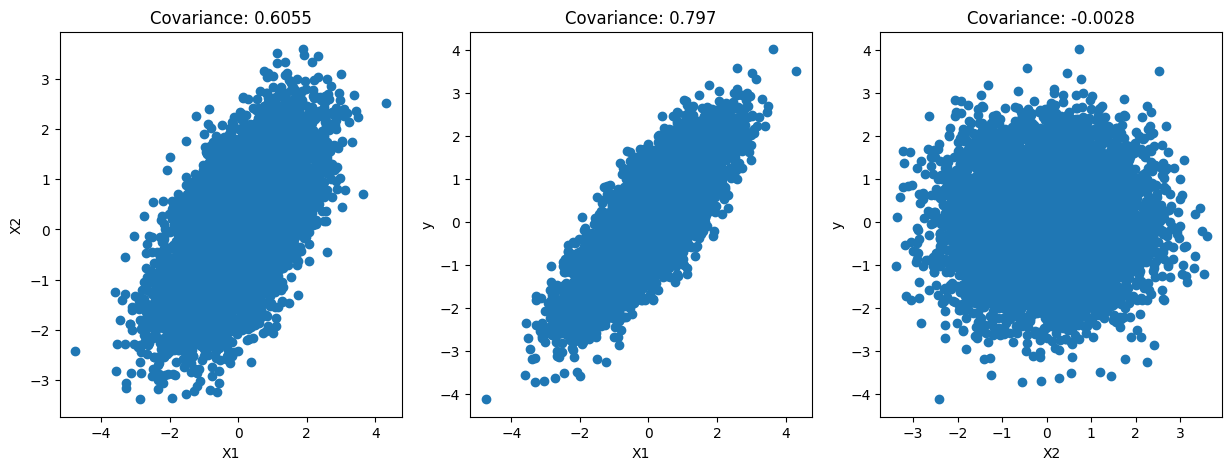

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_title('Covariance: ' + str(round(C[0][1],4)))
ax[1].scatter(X[:, 0], y)
ax[1].set_xlabel('X1')
ax[1].set_ylabel('y')
ax[1].set_title('Covariance: ' + str(np.round(ry[0],4)))
ax[2].scatter(X[:, 1], y)
ax[2].set_xlabel('X2')
ax[2].set_ylabel('y')
ax[2].set_title('Covariance: ' + str(np.round(ry[1],4)))
plt.show()

In [7]:
(w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)
phi_1 = 0.5 * (R1 + sum(Rn) - R2)
phi_2 = 0.5 * (R2 + sum(Rn) - R1)
print(phi_1, phi_2)

0.8164756240799163 0.18186671035862473


In [8]:
zeros  = [np.matmul(X[:i, :].T,y[:i])[1][0] / len(z) for i in range(1,samples)]
x_axis = [i for i in range(1,samples)]
plt.plot(x_axis, zeros)
plt.xlabel('Number of data items')
plt.ylabel('Covariance')
plt.show()

IndexError: invalid index to scalar variable.

In [20]:
z = np.random.normal(0, 1, (samples, features))

In [21]:
np.matmul(z.T, z) / len(z)

array([[1.14999483, 0.0229285 ],
       [0.0229285 , 0.64106464]])